# Distribution plot系
- Distribution plot系はnumericとカテゴリそれぞれ種類がある。
- displot(kind='')か、histplot()のように直接呼び出すか。前者はFaceGridを使うFigureーlevelオブジェクトで後者はaxes-level
- histplot()はヒストグラム。二変数ならヒートマップ
- kdeplot()はヒストグラムの近似で綺麗で直感的なマップを描く
- ecdfplot()は累積を表現する
- 公式https://seaborn.pydata.org/tutorial/distributions.html

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [52]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## `sns.histplot()`ヒストグラム
- xにnumericのみを指定 -- numericの分布を見る通常のヒストグラム
- x = numeric, y = numeric でヒートマップ
- x = numeric, y = categorical でカラーマップ: scatter plotに近いが、より分布を表現するのに適している
- x = categorical, y = categorical　でのヒートマップ：

<AxesSubplot:xlabel='species', ylabel='species'>

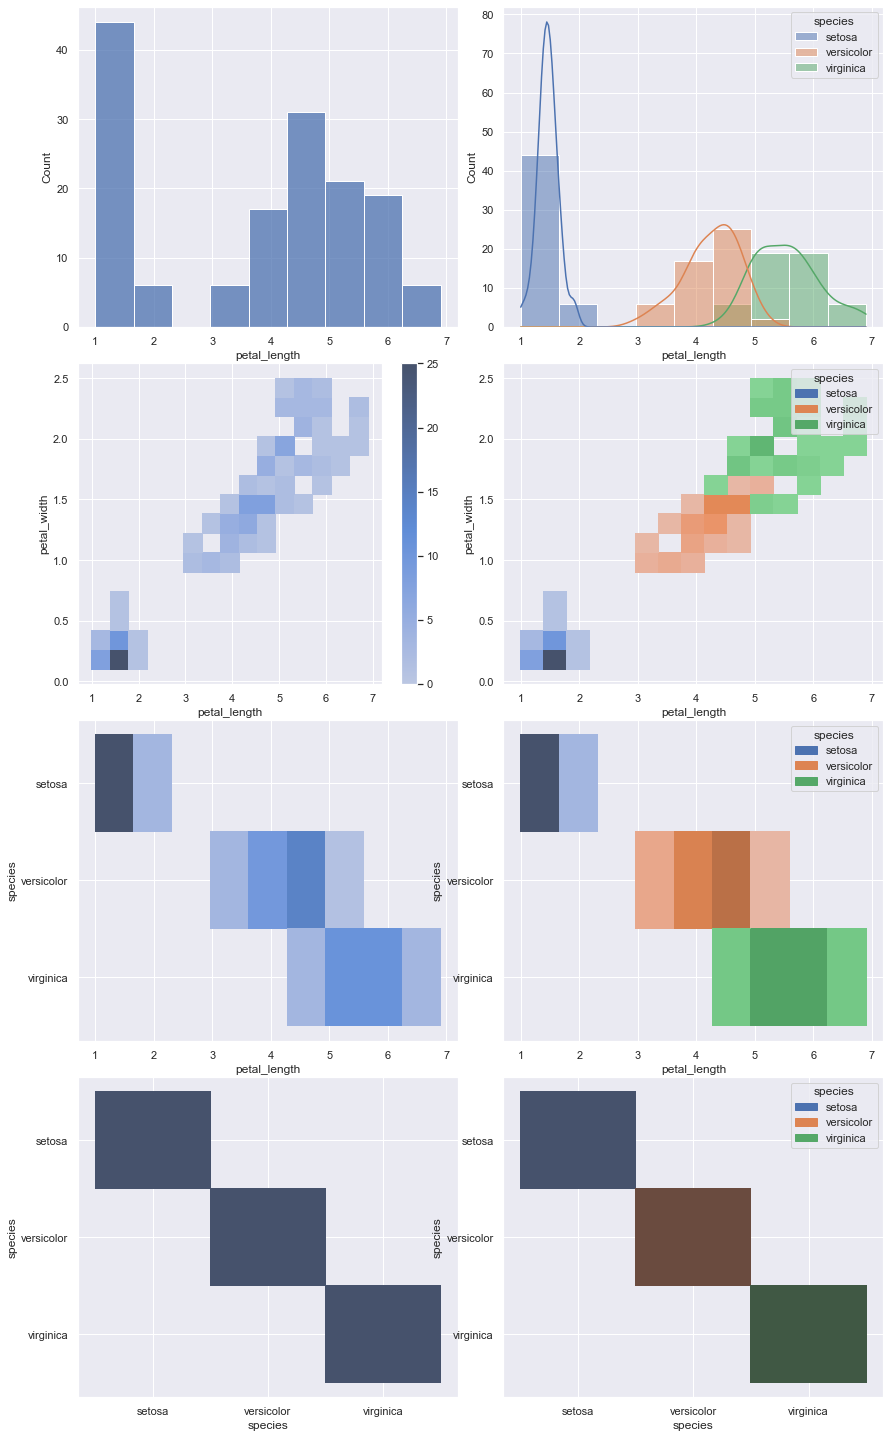

In [95]:
f, a = plt.subplots(4, 2, figsize=(12,20))
plt.tight_layout()
# x = numeric, histgram
sns.histplot(data=iris, x='petal_length', ax=a[0,0])
sns.histplot(data=iris, x='petal_length', hue='species', kde=True, ax=a[0,1])
# x = numeric, y = numeric, heatmap
sns.histplot(data=iris, x='petal_length', y='petal_width', bins=15, cbar=True, ax=a[1,0])
sns.histplot(data=iris, x='petal_length', y='petal_width', hue='species', bins=15, ax=a[1,1])
# x = numeric, y = cetagorical, color map
sns.histplot(data=iris, x='petal_length', y='species', ax=a[2,0])
sns.histplot(data=iris, x='petal_length', y='species', hue='species', ax=a[2,1])
# x = categorical, y = categorical, categorical heat map
sns.histplot(data=iris, x='species', y='species', ax=a[3,0])
sns.histplot(data=iris, x='species', y='species', hue='species', ax=a[3,1])

## `sns.kdeplot()`kernel density estimate plot
- histplot()を密度計算から滑らかに近似して描く方法
- histplot()と違い、categoricalは受け付けない

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

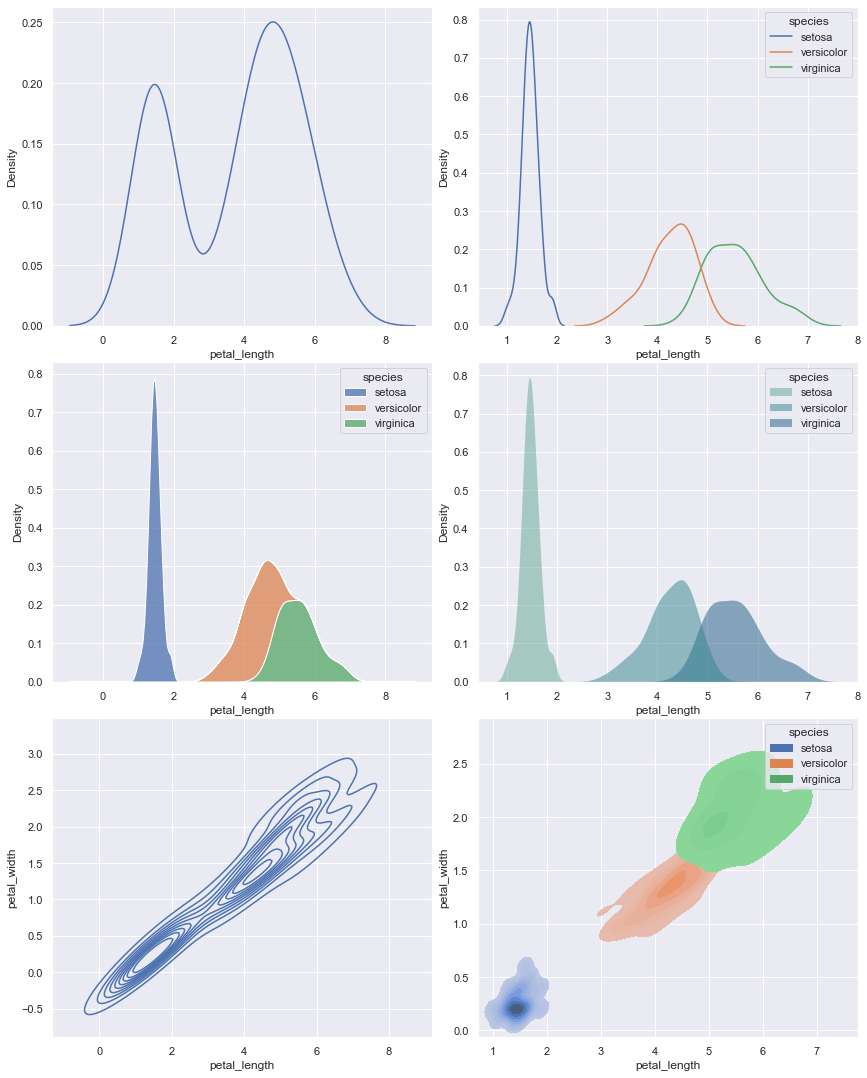

In [110]:
f, a = plt.subplots(3, 2, figsize=(12,15))
plt.tight_layout()
# x = numeric, kde
sns.kdeplot(data=iris, x='petal_length', ax=a[0,0])
sns.kdeplot(data=iris, x='petal_length', hue='species', ax=a[0,1])
sns.kdeplot(data=iris, x='petal_length', hue='species', multiple='stack', ax=a[1,0])
sns.kdeplot(data=iris, x='petal_length', hue='species', fill=True, palette='crest', linewidth=0, alpha=.5, ax=a[1,1])
# x = numeric, y = numeric
sns.kdeplot(data=iris, x='petal_length', y='petal_width', ax=a[2,0])
sns.kdeplot(data=iris, x='petal_length', y='petal_width', hue='species', fill=True, ax=a[2,1])


## `sns.ecdfplot()`emprical cumulative distribution functions
- 累積型の分布表記。意外と使うかも
- yに変数をプロットし、xをproportionをした方が自然な感じがする。

<AxesSubplot:xlabel='Proportion', ylabel='petal_length'>

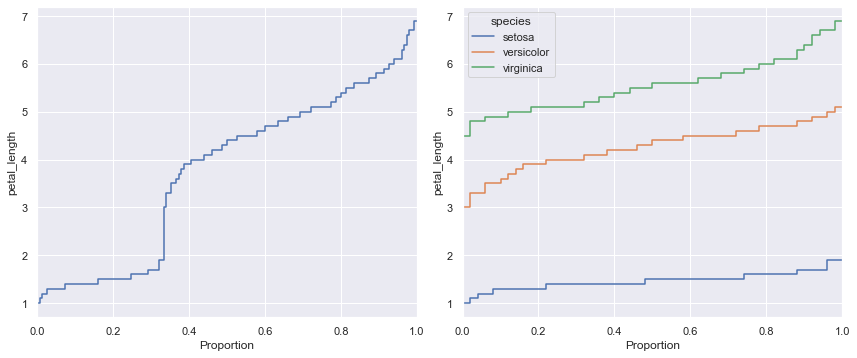

In [116]:
f, a = plt.subplots(1, 2, figsize=(12,5))
plt.tight_layout()
# x = numeric, kde
sns.ecdfplot(data=iris, y='petal_length', ax=a[0])
sns.ecdfplot(data=iris, y='petal_length', hue='species', ax=a[1])

## `sns.displot()` distribution plot系全般をFaceGrid型で描ける。

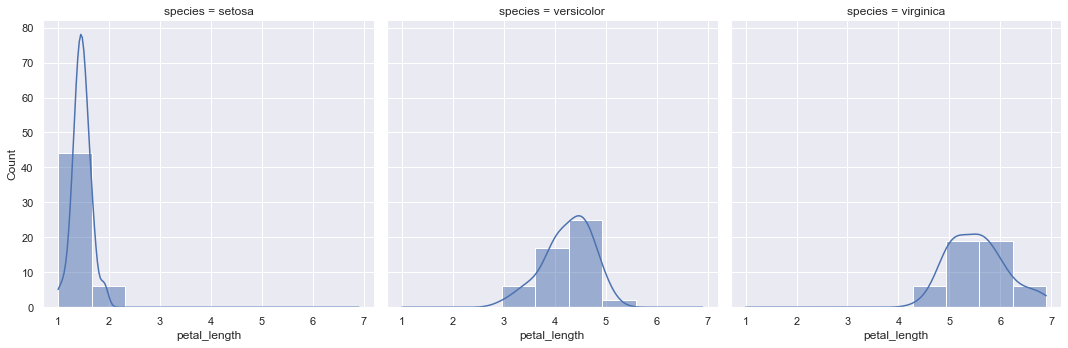

In [122]:
sns.displot(kind='hist', data=iris, x='petal_length', kde=True, col='species')

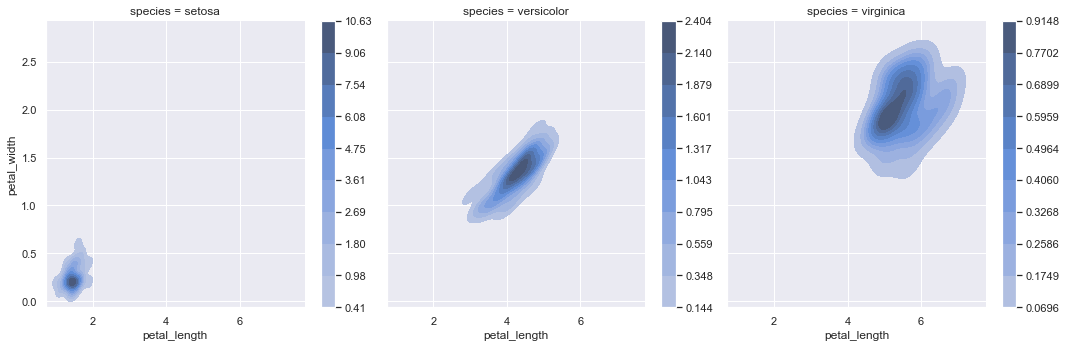

In [124]:
sns.displot(kind='kde', data=iris, x='petal_length', y='petal_width', fill=True, cbar=True, col='species')